# Do your assignment:
1. Sperate your dataset into train and test based on resampled data. (3 Times)
2. Create model and check accuracy for each cross validation technique.
3. Upload your data in github and put the link in google classroom assignmrnt section.

In [1]:
#import libraries 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 



In [192]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Customer-Churn-Prediction.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.shape

(7043, 21)

In [7]:
df.duplicated()# To check the Duplicate Values

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

In [8]:
#drop duplicates
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(7043, 21)

In [10]:
df.isnull().any() # To Check the nul values

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [11]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

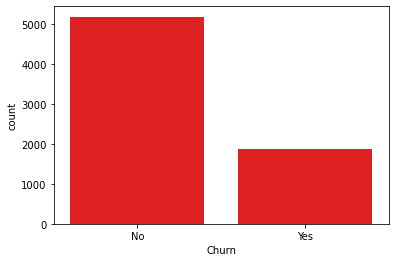

In [12]:
sns.countplot(df['Churn'],color='red')

In [13]:
#Basic Visualization using Seaborn Library

<AxesSubplot:xlabel='gender', ylabel='count'>

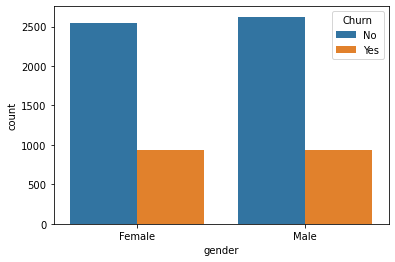

In [14]:
sns.countplot(x = 'gender', hue='Churn', data=df)

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

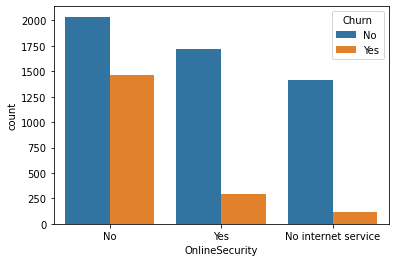

In [15]:
sns.countplot(x = 'OnlineSecurity',hue='Churn', data=df)

In [16]:
df['OnlineSecurity'].unique() 

array(['No', 'Yes', 'No internet service'], dtype=object)

In [17]:
df['OnlineSecurity'].value_counts() 

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

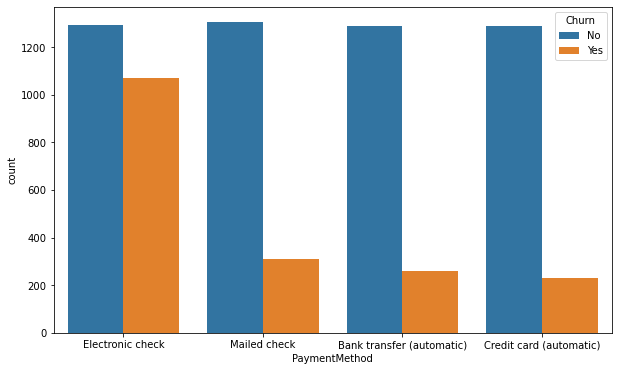

In [18]:
plt.subplots(figsize=(10,6)) 
sns.countplot(x = 'PaymentMethod',hue='Churn', data=df) 

# Preprocesing the data set


In [19]:
#Drop Customer id
df = df.drop('customerID', axis=1)

In [20]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [21]:
df.shape

(7043, 20)

# Encode the data set

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
label = LabelEncoder()

In [24]:
from pandas.core.dtypes.common import is_numeric_dtype

for column in df.columns:
    if is_numeric_dtype(df[column]):
        continue
    else:
        df[column] = label.fit_transform(df[column])

In [25]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


# Separate X,Y

In [26]:
x = df.drop('Churn',axis=1) #separate dependent and independent variable
y = df['Churn']

In [27]:
x.shape

(7043, 19)

In [28]:
y.shape

(7043,)

In [29]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int32

# Imbalanced Data Handling

In [30]:
df.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [31]:
churned = (5174/(5174+1869)) * 100
not_churned = (1869/(5174+1869)) * 100

In [32]:
print('Not churned {} percent of total people'.format(not_churned))
print('Churned {} percent of total people'.format(churned))

Not churned 26.536987079369588 percent of total people
Churned 73.4630129206304 percent of total people


In [33]:
churn_no = df[df['Churn']==0]
churn_yes = df[df['Churn']==1]

In [34]:
churn_no.shape

(5174, 20)

In [35]:
churn_yes.shape

(1869, 20)

# Synthetic Minority Oversampling Technique (SMOTETomek)

In [36]:
 !pip install imblearn

In [37]:
from imblearn.combine import SMOTETomek

In [38]:
sm = SMOTETomek(random_state=42)

In [39]:
X,Y = sm.fit_resample(x,y)

In [40]:
X.shape

(9612, 19)

In [41]:
Y.shape

(9612,)

# Near Miss for Under_Sampling

In [42]:
from imblearn.under_sampling import NearMiss

In [43]:

NearMiss_obj = NearMiss()
new_x , new_y = NearMiss_obj.fit_resample(x,y)


In [44]:
new_x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,0,0,1,1,0,2,1,1,1,1,1,1,0,0,3,20.90,1624
1,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,2,69.90,5454
2,1,0,0,0,1,1,0,2,1,1,1,1,1,1,0,0,3,20.20,1610
3,1,0,0,0,1,1,0,2,1,1,1,1,1,1,0,0,3,20.20,1610
4,1,0,0,0,1,1,0,2,1,1,1,1,1,1,0,0,3,20.20,1610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3733,1,0,0,0,12,1,0,0,0,0,0,2,2,0,1,1,2,59.80,5651
3734,0,0,0,0,9,1,0,0,0,0,0,0,0,0,0,1,0,44.20,3448
3735,1,1,0,0,1,1,2,1,0,0,0,0,0,0,0,1,2,75.75,5776
3736,0,0,0,0,67,1,2,1,2,2,2,0,2,0,0,1,1,102.95,5431


In [45]:
new_y

0       0
1       0
2       0
3       0
4       0
       ..
3733    1
3734    1
3735    1
3736    1
3737    1
Name: Churn, Length: 3738, dtype: int32

In [46]:
new_x.shape

(3738, 19)

In [47]:
new_y.shape

(3738,)

In [48]:
df.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [49]:
new_y.value_counts()

0    1869
1    1869
Name: Churn, dtype: int64

# Over sampling

In [50]:
df2 = df.copy()

In [51]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [52]:
df2.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [53]:
from imblearn.over_sampling import RandomOverSampler

In [54]:
# https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html

In [55]:
over = RandomOverSampler(random_state=100)

In [56]:
x_new , y_new = over.fit_resample(x,y)

In [57]:
x_new.shape, y_new.shape

((10348, 19), (10348,))

In [58]:
y_new.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

# Now we will apply defferent types of Cross Validation Tecnique to compare the Accurecy of the defferent types of Models.

# Cross Validation Name: Hold Out Cross Validation

# Split xtrain,ytrain

In [154]:
from sklearn.model_selection import train_test_split 

In [155]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,train_size=.75,random_state=42)

# Model Name:DecisionTree Classifier

In [157]:
from sklearn.tree import DecisionTreeClassifier

In [158]:
clf=DecisionTreeClassifier()

In [203]:
Xtrain,Xtest, Ytrain,Ytest = train_test_split(X,Y, train_size=.75,random_state=42)
# Using Synthetic Minority Oversampling Technique (SMOTETomek)

In [204]:
clf.fit(Xtrain,Ytrain) 

DecisionTreeClassifier()

In [205]:
clf.score(Xtest,Ytest)

0.8023304203079484

In [66]:
# Using Nearmiss for Under_sampling

In [67]:
new_xtrain,new_xtest, new_ytrain,new_ytest = train_test_split(new_x,new_y, train_size=.75,random_state=42) 

In [68]:
clf.fit(new_xtrain,new_ytrain)

DecisionTreeClassifier()

In [69]:
clf.score(new_xtest,new_ytest)

0.6192513368983957

In [70]:
#Using Over Sampling

In [71]:
x_newtrain,x_newtest, y_newtrain,y_newtest = train_test_split(x_new,y_new, train_size=.75,random_state=42) 

In [72]:
clf.fit(x_newtrain,y_newtrain)

DecisionTreeClassifier()

In [73]:
clf.score(x_newtest,y_newtest)

0.8581368380363356

In [ ]:
# Comment: After Resampling 3 times,I got the following Accurecy scores:
#using SMOTETomek-0.8044111527257595
# Using Nearmiss for Under_sampling-0.6192513368983957
#Using Over Sampling-0.8581368380363356


# K Fold Cross Validation

In [74]:
from sklearn.model_selection import KFold, cross_val_score

In [75]:
kfold = KFold(n_splits=5) #each fold contain 20% data

In [76]:
result = cross_val_score(clf,X,Y,cv=kfold) # Using Synthetic Minority Oversampling Technique (SMOTETomek)

In [77]:
result

array([0.74310972, 0.75091004, 0.74817898, 0.855359  , 0.89802289])

In [78]:
result.mean()

0.7991161269759843

In [79]:
result = cross_val_score(clf,new_x,new_y,cv=kfold) # Using Nearmiss for Under_sampling

In [80]:
result

array([0.35160428, 0.48796791, 0.61764706, 0.52744311, 0.47791165])

In [81]:
result.mean()

0.4925148007359206

In [82]:
result = cross_val_score(clf,x_new,y_new,cv=kfold) #Using Over Sampling

In [83]:
result

array([0.81642512, 0.80724638, 0.83140097, 0.92073465, 0.99565007])

In [84]:
result.mean()

0.8742914381378668

In [ ]:
# Comment: After Resampling 3 times,I got the following Accurecy scores:
#using SMOTETomek-0.7991161269759843
# Using Nearmiss for Under_sampling-0.4925148007359206
#Using Over Sampling-0.8742914381378668


# Stratified k fold cross Validation

In [85]:
from sklearn.model_selection import StratifiedKFold

In [86]:
st = StratifiedKFold(n_splits=4)

In [87]:
result2 = cross_val_score(clf,X,Y,cv=st) # Using Synthetic Minority Oversampling Technique (SMOTETomek)

In [88]:
result2

array([0.69121931, 0.80441115, 0.8460258 , 0.852268  ])

In [89]:
result2.mean() # Accurcy

0.798481065334998

In [90]:
result2= cross_val_score(clf,new_x,new_y,cv=st)  # Using Nearmiss for Under_sampling

In [91]:
result2

array([0.45989305, 0.61390374, 0.60920771, 0.59207709])

In [92]:
result2.mean()

0.5687703970044315

In [93]:
result2 = cross_val_score(clf,x_new,y_new,cv=st)  # Using Over sampling

In [94]:
result2

array([0.85852339, 0.86045613, 0.88094318, 0.89911094])

In [95]:
result2.mean()

0.8747584074217241

In [ ]:
# Comment: After Resampling 3 times,I got the following Accurecy scores:
#using SMOTETomek-0.798481065334998
# Using Nearmiss for Under_sampling-0.5687703970044315
#Using Over Sampling-0.8747584074217241

# Leave One Out Cross Validation

In [96]:
from sklearn.model_selection import LeaveOneOut

In [97]:
le = LeaveOneOut()

In [98]:
result3 = cross_val_score(clf,X,Y,cv=le) # Using Synthetic Minority Oversampling Technique (SMOTETomek)

In [99]:
result3

array([0., 1., 1., ..., 1., 1., 0.])

In [100]:
result3.mean()

0.8135663753641281

In [101]:
result3 = cross_val_score(clf,new_x,new_y,cv=le)  # Using Nearmiss for Under_sampling

In [102]:
result3.mean()

0.6096843231674692

In [139]:
result3 = cross_val_score(clf,x_new,y_new,cv=le) # using Over Sampling

In [140]:
result3.mean()

0.8968882875918052

In [141]:
# Comment: After Resampling 3 times,I got the following Accurecy scores:
#using SMOTETomek-0.8135663753641281
# Using Nearmiss for Under_sampling-0.6096843231674692
#Using Over Sampling-0.8968882875918052

# Model Name: Ada Boost classifier

In [ ]:
# Cross Validation Name: Hold Out Cross Validation

In [142]:
Xtrain,Xtest, Ytrain,Ytest = train_test_split(X,Y, train_size=.75,random_state=42)
# Using Synthetic Minority Oversampling Technique (SMOTETomek)

In [143]:
from sklearn.ensemble import AdaBoostClassifier

In [144]:
ada = AdaBoostClassifier()

In [145]:
ada.fit(Xtrain,Ytrain)

AdaBoostClassifier()

In [146]:
ada.score(Xtest,Ytest)

0.8331252600915522

In [147]:
# Using Nearmiss for Under_sampling

In [148]:
ada.fit(new_xtrain,new_ytrain)

AdaBoostClassifier()

In [168]:
ada.score(new_xtest,new_ytest)

0.613903743315508

In [150]:
#Using Over Sampling

In [151]:
ada.fit(x_newtrain,y_newtrain)

AdaBoostClassifier()

In [152]:
ada.score(x_newtest,y_newtest)

0.7715500579822188

In [153]:
# Comment: After Resampling 3 times,I got the following Accurecy scores:
#using SMOTETomek-0.8331252600915522
# Using Nearmiss for Under_sampling-0.613903743315508
#Using Over Sampling-0.7715500579822188

# K Fold Cross Validation

In [162]:
result = cross_val_score(ada,X,Y,cv=kfold) # Using Synthetic Minority Oversampling Technique (SMOTETomek)

In [163]:
result

array([0.78523141, 0.77223089, 0.77263267, 0.88033299, 0.88709677])

In [164]:
result.mean()

0.8195049466911039

In [165]:
result = cross_val_score(ada,new_x,new_y,cv=kfold)# Using Nearmiss for Under_sampling

In [166]:
result

array([0.3342246 , 0.46256684, 0.70053476, 0.49933066, 0.53145917])

In [167]:
result.mean()

0.505623205835821

In [169]:
result = cross_val_score(ada,x_new,y_new,cv=kfold)  #Using Over Sampling

In [170]:
result

array([0.72657005, 0.7173913 , 0.72222222, 0.76800387, 0.69163847])

In [171]:
result.mean()

0.7251651828347143

In [172]:
# Comment: After Resampling 3 times,I got the following Accurecy scores:
#using SMOTETomek-0.8195049466911039
# Using Nearmiss for Under_sampling-0.505623205835821
#Using Over Sampling-0.7251651828347143

# Stratified k fold cross Validation

In [173]:
result2 = cross_val_score(ada,X,Y,cv=st) # Using Synthetic Minority Oversampling Technique (SMOTETomek)

In [174]:
result2

array([0.73449854, 0.8343737 , 0.84893883, 0.87390762])

In [175]:
result2.mean()

0.822929671244278

In [176]:
result2= cross_val_score(ada,new_x,new_y,cv=st)  # Using Nearmiss for Under_sampling

In [177]:
result2

array([0.72657005, 0.7173913 , 0.72222222, 0.76800387, 0.69163847])

In [178]:
result2.mean()

0.822929671244278

In [179]:
result2 = cross_val_score(ada,x_new,y_new,cv=st)  # Using Over sampling

In [180]:
result2

array([0.77077696, 0.76575184, 0.76149981, 0.77116351])

In [181]:
result2.mean()

0.7672980286045612

In [182]:
# Comment: After Resampling 3 times,I got the following Accurecy scores:
#using SMOTETomek-0.822929671244278
# Using Nearmiss for Under_sampling-0.822929671244278
#Using Over Sampling-0.7672980286045612

In [ ]:
# XGBoost Classifier

In [183]:
!pip install xgboost

In [184]:
import xgboost 
from xgboost import XGBClassifier

In [210]:
xgb=XGBClassifier()

In [231]:
xgb.fit(xtrain,ytrain)

[20:06:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

# For  Hold Out Cross Validation

In [232]:
xgb.fit(Xtrain,Ytrain) # Using Synthetic Minority Oversampling Technique (SMOTETomek)

[20:06:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [213]:
xgb.score(Xtest,Ytest)

0.8684977111943404

In [214]:
# Using Nearmiss for Under_sampling

In [215]:
xgb.score(new_xtest,new_ytest)

0.8149732620320855

In [216]:
xgb.score(x_newtest,y_newtest)# Using Over sampling

0.8778507924236567

In [217]:
# Comment: After Resampling 3 times,I got the following Accurecy scores:
#using SMOTETomek-0.8684977111943404
# Using Nearmiss for Under_sampling-0.8149732620320855
#Using Over Sampling-0.8778507924236567

# K Fold Cross Validation

In [221]:
result = cross_val_score(xgb,X,Y,cv=kfold) # Using Synthetic Minority Oversampling Technique (SMOTETomek)

[19:56:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:56:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:56:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:56:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [222]:
result

array([0.81175247, 0.79771191, 0.80072841, 0.9157128 , 0.96149844])

In [223]:
result.mean()

0.8574808049554032

In [224]:
result = cross_val_score(xgb,new_x,new_y,cv=kfold)# Using Nearmiss for Under_sampling

[19:57:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:57:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:57:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:57:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [225]:
result

array([0.31417112, 0.50534759, 0.61229947, 0.50736278, 0.53547523])

In [226]:
result.mean()

0.494931240111963

In [227]:
result = cross_val_score(xgb,x_new,y_new,cv=kfold) #Using Over Sampling

[19:59:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:59:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:59:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:59:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [228]:
result

array([0.81256039, 0.8       , 0.79565217, 0.89463509, 0.88980184])

In [229]:
result.mean()

0.8385298972875411

In [ ]:
# Comment: After Resampling 3 times,I got the following Accurecy scores:
#using SMOTETomek-0.8574808049554032
# Using Nearmiss for Under_sampling-0.494931240111963
#Using Over Sampling-0.8385298972875411

# Stratified k fold cross Validation

In [233]:
result2 = cross_val_score(xgb,X,Y,cv=st) # Using Synthetic Minority Oversampling Technique (SMOTETomek)

[20:17:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:17:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:17:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:17:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [234]:
result2

array([0.71535581, 0.85018727, 0.8934665 , 0.92051602])

In [235]:
result2.mean()

0.8448813982521848

In [236]:
result2= cross_val_score(xgb,new_x,new_y,cv=st)  # Using Nearmiss for Under_sampling

[20:27:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:27:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:27:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:27:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [237]:
result2

array([0.81256039, 0.8       , 0.79565217, 0.89463509, 0.88980184])

In [238]:
result2.mean()

0.6019466614755694

In [243]:
result2 = cross_val_score(xgb,x_new,y_new,cv=kfold)  #Using Over Sampling

[20:43:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:43:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:43:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:43:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [240]:
result2

array([0.50160428, 0.62566845, 0.6627409 , 0.61777302])

In [241]:
result2.mean()

0.6019466614755694

In [244]:
# Comment: After Resampling 3 times,I got the following Accurecy scores:
#using SMOTETomek-0.8448813982521848
# Using Nearmiss for Under_sampling-0.6019466614755694
#Using Over Sampling-0.6019466614755694

# Conclution

In [ ]:
# For Decission Tree Classifier when I checked accuracy for each cross validation technique,
I got the Highest accurecy when I apply Leave One Out Cross Validation and by using Over Sampling,
I got the Accurecy 0.8968882875918052
# For Ada Boost classifier when I checked accuracy for each cross validation technique,
I got the Highest accurecy when I apply Hold Out Cross Validation and by using SMOTETomek.
I got the Accurecy 0.8331252600915522
# For XGBoost Classifier when I checked accuracy for each cross validation technique,
I got the Highest accurecy when I apply Hold Out Cross Validation and by using Over Sampling,
I got the Accurecy 0.8778507924236567
